<a href="https://colab.research.google.com/github/ramon-santana-silva/miniprojeto01/blob/main/roofimoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Mini Projeto Roof Imóveis </h1>

<h1>CONTEXTO</h1>
Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro
e quer expandir sua área de atuação fazendo um investimento internacional,
com isso, uma consultoria estratégica permitirá investir em imóveis no Condado de County, nos Estados
Unidos.
<h1>OBJETIVO</h1>
Construir um modelo que permite a "Roof Imóveis" identificar os 5 imóveis melhores para investir e quais o 5 imóveis que não deveria investir de forma alguma.

In [ ]:
#bibliotecas de manipulação de dados 
#!pip install pandas 
#!pip install numpy
#!pip install seaborn
#pip install matplotlib


In [1]:
#importação das bibliotecas
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

O Dataset apresenta a venda de imóveis e suas características na região
de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total
de 21 atributos.

<h2>Extração/ Obtenção de dados</h2>
As bases de dados foram retiradas do site: https://www.kaggle.com/harlfoxem/housesalesprediction e https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/ e dataset extraidos do repositorio Github :'https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/kc_house_data.csv' e 'https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv'

In [4]:
#extraindo dataframe
DATA_URL ='https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/kc_house_data.csv'     
#convertendo objeto para data parse_dates
roof_df= pd.read_csv(DATA_URL,sep=',',parse_dates=["date"])


<h1>Informação das colunas do dataframe roof_df</h1>
                             

*   id - Identiﬁcador único do imóvel 
*   view - Grau de quão belo é a vista do imóvel (0 a 4)
*   date - Data da VendaconditionCondição da casa (1 a 5)
*   price - Preço de venda
*   grade - Classiﬁcação por qualidade de material utilizado na
construção
*   bedrooms - Nº de Quartos
*   bathrooms - Nº de Banheiros 
*   sqft_above - Área em acima do solo em ft²
*   sqft_liv - Tamanho de área habitável em ft²sqft_basmtÁrea em abaixo do solo em ft²
*   sqft_lot - Tamanho do terreno em ft²
*   yr_built - Ano de construção
*   ﬂoors - Número de andares
*   yr_renov - Ano de restauração, caso o contrário, 0.
*   zipcode - Zip Code 5 - Similar ao CEP
*   waterfront - Indicativo se o imóvel é a beira-mar
*   lat - Latitude
*   long - Longitude
*   squft_liv15 - Média da área habitável dos 15 imóveis mais próximos,
em ft²
*   squft_lot15 - Média da área do lote dos 15 imóveis mais próximos,
em ft²













In [3]:
#extraindo dataframe zipcode_df
DATA_URL2='https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv'
zipcode_df=pd.read_csv(DATA_URL2 , sep=",", encoding='UTF-8')



<h1>Informação das colunas do dataframe zipcode_df</h1>

*  OBJECTID -	Código ID
*  zipcode - Zip Code 5 - Similar ao CEP
*  COUNTY - Código do municipio
*  COUNTY	County code
*  ZIP_TYPE -	tipo de zipcode: padrão ou caixa postal
*  Shape_Leng -	comprimento poligonal
*  Shape_Area -	aréa poligonal








<h2>Limpeza dos Dataframes roof_df e zipcode_df 

In [5]:
#zipcode_df sendo reduzido atraves da criação de novo dataframe somente com o municipio de King County alvo do projeto
zipKingCounty_df= zipcode_df[(zipcode_df.COUNTY == 33)]
zipKingCounty_df

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAME,PREFERRED_CITY,Shape_Length,Shape_Area
0,1,98001,98001,33,Standard,King County,AUBURN,148134.771476,5.261214e+08
1,2,98002,98002,33,Standard,King County,AUBURN,105168.476823,2.044452e+08
2,3,98003,98003,33,Standard,King County,FEDERAL WAY,121645.069928,3.169812e+08
3,4,98004,98004,33,Standard,King County,BELLEVUE,108801.063326,2.014512e+08
4,5,98005,98005,33,Standard,King County,BELLEVUE,116930.354131,2.112733e+08
...,...,...,...,...,...,...,...,...,...
100,101,98199,98199,33,Standard,King County,SEATTLE,56408.722420,1.132192e+08
108,109,98224,98224,33,PO Box,King County,BARING,187335.039773,1.720745e+09
118,119,98288,98288,33,PO Box,King County,SKYKOMISH,484891.351634,8.749464e+09
147,148,98354,98354,33,Standard,King County,MILTON,25310.379574,1.500487e+07


In [6]:
#identificando valores únicos do dataframe zipKingCounty_df
zipKingCounty_df.nunique()

OBJECTID          87
ZIP               87
ZIPCODE           87
COUNTY             1
ZIP_TYPE           2
COUNTY_NAME        1
PREFERRED_CITY    33
Shape_Length      87
Shape_Area        87
dtype: int64

In [7]:
# Verificando o cabeçalho
roof_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# Verificando informações do dataset
roof_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [9]:
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        209 non-null    int64  
 1   ZIP             209 non-null    int64  
 2   ZIPCODE         209 non-null    int64  
 3   COUNTY          209 non-null    int64  
 4   ZIP_TYPE        209 non-null    object 
 5   COUNTY_NAME     209 non-null    object 
 6   PREFERRED_CITY  209 non-null    object 
 7   Shape_Length    209 non-null    float64
 8   Shape_Area      209 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 14.8+ KB


In [10]:
# Verificando quantos dados nulos há
roof_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
#verificando quantos dados nulos há
zipcode_df.isnull().sum()

OBJECTID          0
ZIP               0
ZIPCODE           0
COUNTY            0
ZIP_TYPE          0
COUNTY_NAME       0
PREFERRED_CITY    0
Shape_Length      0
Shape_Area        0
dtype: int64

In [12]:
df=pd.merge(roof_df, zipcode_df, left_on='zipcode', right_on='ZIPCODE', how='left').drop('ZIPCODE',axis=1).drop('COUNTY',axis=1).drop('ZIP_TYPE',axis=1).drop('COUNTY_NAME',axis=1)  
df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,97,98178,SEATTLE,67151.963868,1.353411e+08
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,81,98125,SEATTLE,66923.859716,1.496818e+08
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,24,98028,KENMORE,75146.222022,1.732332e+08
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,85,98136,SEATTLE,52855.048472,6.318620e+07
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,56,98074,SAMMAMISH,115554.667658,3.277498e+08


In [13]:
#identificando valores únicos do dataframe df
df.nunique()

id                21436
date                372
price              4028
bedrooms             13
bathrooms            30
sqft_living        1038
sqft_lot           9782
floors                6
waterfront            2
view                  5
condition             5
grade                12
sqft_above          946
sqft_basement       306
yr_built            116
yr_renovated         70
zipcode              70
lat                5034
long                752
sqft_living15       777
sqft_lot15         8689
OBJECTID             77
ZIP                  70
PREFERRED_CITY       25
Shape_Length         77
Shape_Area           77
dtype: int64

In [14]:
#removendo coluna zip pois no zipcode tem as mesmas informações
df.drop('ZIP', axis=1, inplace=True)


In [15]:
#removendo coluna id
df.drop('id', axis=1, inplace=True)

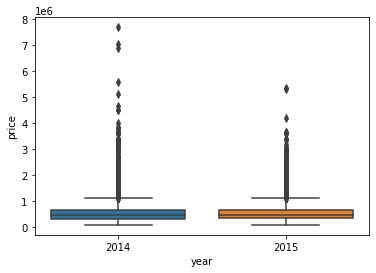

In [16]:
#funções para ajustar data
df['month']=df['date'].apply(lambda date:date.month)
df['year']= df['date'].apply(lambda date:date.year)
sns.boxplot(x='year', y='price', data=df);

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,23309.0,5.364409e+05,3.611988e+05,75000.000000,3.225000e+05,4.500000e+05,6.390000e+05,7.700000e+06
bedrooms,23309.0,3.375306e+00,9.199285e-01,0.000000,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,23309.0,2.121713e+00,7.642047e-01,0.000000,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,23309.0,2.094036e+03,9.186376e+02,290.000000,1.440000e+03,1.930000e+03,2.570000e+03,1.354000e+04
sqft_lot,23309.0,1.661673e+04,4.535101e+04,520.000000,5.137000e+03,7.760000e+03,1.111900e+04,1.651359e+06
floors,23309.0,1.494745e+00,5.367723e-01,1.000000,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,23309.0,7.035909e-03,8.358651e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,23309.0,2.360033e-01,7.698170e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,23309.0,3.406195e+00,6.470400e-01,1.000000,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,23309.0,7.672487e+00,1.176317e+00,1.000000,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


In [ ]:
'''roof_df[:12]
#renomeando colunas
roof_df= roof_df.rename(columns={'Identificador único do imóvel':'Id Imóvel',
 'date':'Data da Venda','price':'Preço','bedrooms':'Nº de Quartos','bathrooms':'Nº de Banheiros','sqft_living':'Área hab. em ft²','sqft_lot':'Terreno em ft²','floors':'Nº de andares','waterfront':'Beira-mar','view':'vista do imóvel','condition':'Condição','grade':'Classificação/Qualidade Material','sqft_above':'Área acima do solo em ft²','sqft_basement':'Área em baixo do solo em ft²','yr_built':'Ano de construção','yr_renovated':'Ano de restauração','zipcode':'ZIP Code 5','lat':'latitude','long':'Longitude','sqft_living15':'Média da área Hab. dos 15 imóveis + proximos em ft²','sqft_lot15':'Média da área do lote dos 15 imóveis + próximos em ft²'})'''

In [18]:
#df.groupby(['Animal']).mean()Max Speed
#df.sort_values(by=['col1'])
'''roof_df.groupby(['Preço']).max()
df_max_roof=roof_df.groupby(['Preço']).max()
df_max_roof.sort_values(by=['Preço'],ascending=False)'''
df.sort_values('price',ascending=False).head(5)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,OBJECTID,PREFERRED_CITY,Shape_Length,Shape_Area,month,year
7840,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,4,...,47.6298,-122.323,3940,8800,64,SEATTLE,37488.780791,4.322189e+07,10,2014
4219,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,3,...,47.6500,-122.214,3930,25449,4,BELLEVUE,108801.063326,2.014512e+08,6,2014
10014,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,3,...,47.6305,-122.240,4540,42730,34,MEDINA,37222.726961,3.934682e+07,9,2014
4753,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,3,...,47.6289,-122.233,3560,24345,34,MEDINA,37222.726961,3.934682e+07,8,2014
1565,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,3,...,47.6232,-122.220,4600,21750,4,BELLEVUE,108801.063326,2.014512e+08,4,2015


In [19]:
#encontrar a cidade do imovel
df['PREFERRED_CITY'].value_counts()


SEATTLE          9232
RENTON           1597
BELLEVUE         1407
AUBURN           1263
KENT             1203
REDMOND           979
KIRKLAND          977
WOODINVILLE       942
FEDERAL WAY       779
ISSAQUAH          733
MAPLE VALLEY      590
ENUMCLAW          468
SAMMAMISH         441
BOTHELL           390
DUVALL            380
SAMMAMIISH        359
SNOQUALMIE        310
KENMORE           283
MERCER ISLAND     282
NORTH BEND        221
CARNATION         124
VASHON            118
BLACK DIAMOND     100
FALL CITY          81
MEDINA             50
Name: PREFERRED_CITY, dtype: int64

<BarContainer object of 23309 artists>

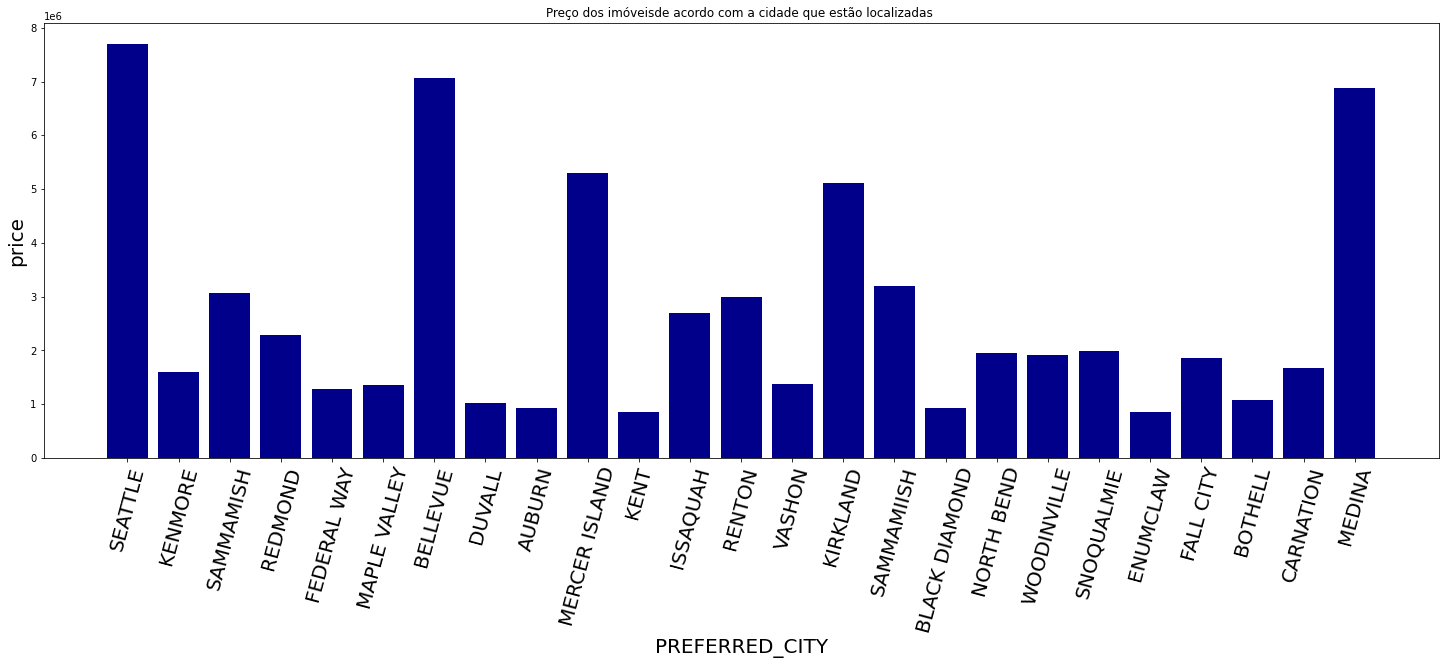

In [25]:
# histogram usando maptplotlib
plt.figure(figsize=(25,8))
plt.title('Preço dos imóveisde acordo com a cidade que estão localizadas ')

plt.xlabel('PREFERRED_CITY',fontsize=20)
plt.ylabel('price', fontsize=20)
plt.xticks(rotation=75, fontsize=20)

plt.bar(df['PREFERRED_CITY'],df['price'], color='darkblue')

In [ ]:
df['zipcode'].value_counts()

98092    702
98103    602
98038    590
98115    583
98052    574
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64